In [2]:
import numpy as np
import pandas as pd
from skbio import DistanceMatrix, TreeNode

import sys
sys.path.append('../')
import phyloviz
from phyloviz.model import Tree


import matplotlib.pyplot as plt
%matplotlib inline 
from scipy.cluster.hierarchy import ward, complete
import pandas.util.testing as pdt

In [3]:
np.random.seed(0)
x = np.random.rand(10)
dm = DistanceMatrix.from_iterable(x, lambda x, y: np.abs(x-y))
lm = complete(dm.condensed_form())
ids = np.arange(len(x)).astype(np.str)
tree = TreeNode.from_linkage_matrix(lm, ids)

# initialize tree with branch length and named internal nodes
for i, n in enumerate(tree.postorder(include_self=True)):
    n.length = 1
    if not n.is_tip():
        n.name = "y%d" % i

In [3]:
tree = TreeNode.read(['(((a:1,e:2)f:1,b:2)g:1,(c:1,d:3)h:2)i:1;'])


In [5]:
t = Tree.from_tree(tree)
t.rescale(500,500)

74.609165340334656

In [6]:
t.update_coordinates(1,0,0,2,1)

[(2.2301939502377812, 2.00173803121137),
 (3.9131359198535742, 2.0823426429476495),
 (3.5693632652849416, -0.70813820377328751),
 (0.34885097950630928, -3.2790527077291802),
 (-2.0626765144773422, -4.2499910737195705)]

In [7]:
node, edge = t.coords(500,500)


In [8]:
type(node)
strnode = node.to_string()
node_dict=node.to_dict('split')


In [9]:
print (node)

  Node id        x        y
a       a  83.3718  292.508
b       b  254.481    487.5
c       c  478.085  225.366
d       d  483.791     12.5
e       e   16.209  420.732
f       f  141.354  339.461
g       g  215.861  343.366
h       h  403.578  221.461
i       i  278.433  302.731


In [10]:
print(edge.to_dict('split'))

{'columns': ['Node id', 'Parent id', 'px', 'py', 'x', 'y'], 'data': [['a', 'f', 141.35398602846797, 339.46141862722482, 83.371774496551481, 292.50834951934343], ['b', 'g', 215.86090210071345, 343.36616063979909, 254.48144795927647, 487.5], ['c', 'h', 403.57843531045097, 221.46096919708964, 478.08535138269644, 225.36571120966394], ['d', 'h', 403.57843531045097, 221.46096919708964, 483.79103611135702, 12.500000000000028], ['e', 'f', 141.35398602846797, 339.46141862722482, 16.20896388864297, 420.73154625569776], ['f', 'g', 215.86090210071345, 343.36616063979909, 141.35398602846797, 339.46141862722482], ['g', 'i', 278.43341317062595, 302.73109682556259, 215.86090210071345, 343.36616063979909], ['h', 'i', 278.43341317062595, 302.73109682556259, 403.57843531045097, 221.46096919708964]], 'index': ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']}


In [11]:
print(node_dict)

{'columns': ['Node id', 'x', 'y'], 'data': [['a', 83.371774496551481, 292.50834951934343], ['b', 254.48144795927647, 487.5], ['c', 478.08535138269644, 225.36571120966394], ['d', 483.79103611135702, 12.500000000000028], ['e', 16.20896388864297, 420.73154625569776], ['f', 141.35398602846797, 339.46141862722482], ['g', 215.86090210071345, 343.36616063979909], ['h', 403.57843531045097, 221.46096919708964], ['i', 278.43341317062595, 302.73109682556259]], 'index': ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']}


In [14]:
df = pd.DataFrame({'0': [404.097, 396.979, np.nan, np.nan, True],
                            '1': [464.724, 174.338, np.nan, np.nan, True],
                            '2': [487.5, 43.2804, np.nan, np.nan, True],
                            '3': [446.172, 359.095, np.nan, np.nan, True],
                            '4': [32.4704, 456.72, np.nan, np.nan, True],
                            '5': [438.468, 14.9717, np.nan, np.nan, True],
                            '6': [81.5024, 485.028, np.nan, np.nan, True],
                            '7': [54.5748, 34.9421, np.nan, np.nan, True],
                            '8': [12.5, 72.8265, np.nan, np.nan, True],
                            '9': [55.2464, 325.662, np.nan, np.nan, True],
                            'y10': [366.837, 313.291, '0', '3', False],
                            'y14': [419.421, 104.579, '2', '5', False],
                            'y15': [373.617, 183.914, '1', 'y14', False],
                            'y16': [305.539, 245.212, 'y10', 'y15', False],
                            'y17': [214.432, 254.788, 'y7', 'y16', False],
                            'y18': [153.134, 186.709, 'y2', 'y17', False],
                            'y2': [91.8354, 118.631, '7', '8', False],
                            'y6': [100.549, 395.421, '4', '6', False],
                            'y7': [146.353, 316.086, '9', 'y6', False]},
                           index=['x', 'y', 'child0', 'child1', 'is_tip']).T
df

,x,y,child0,child1,is_tip
0,404.097,396.979,NaN,NaN,True
1,464.724,174.338,NaN,NaN,True
2,487.5,43.2804,NaN,NaN,True
3,446.172,359.095,NaN,NaN,True
4,32.4704,456.72,NaN,NaN,True
5,438.468,14.9717,NaN,NaN,True
6,81.5024,485.028,NaN,NaN,True
7,54.5748,34.9421,NaN,NaN,True
8,12.5,72.8265,NaN,NaN,True
9,55.2464,325.662,NaN,NaN,True


In [8]:
def plot(node_metadata, edge_metadata):
    """ Plot the tree with the given dataframe of coordinates of points

    We are now plotting with matplotlib
    Parameters
    ----------
    node_metadata : pd.DataFrame
       Contains all of the species attributes.
       Every row corresponds to a unique species
       and every column corresponds to an attribute.
       Metadata may also contain ancestors.
    edge_metadata : pd.DataFrame
       Contains all of the edge attributes.
       Every row corresponds to a unique edge
       and every column corresponds to an attribute.

    """
    # Plot nodes
    col_node_x = node_metadata['x']
    col_node_y = node_metadata['y']
    # TODO: annotation on points
    plt.scatter(col_node_x, col_node_y)

    # Plot edges
    # Get the four columns of coordinates
    col_edge_x = edge_metadata['x']
    col_edge_y = edge_metadata['y']
    col_edge_px = edge_metadata['px']
    col_edge_py = edge_metadata['py']

    row_count = len(edge_metadata.index)

    # Loop through each row and plot the edge
    for index in range(row_count):
        plot_x = [col_edge_x[index], col_edge_px[index]]
        plot_y = [col_edge_y[index], col_edge_py[index]]
        plt.plot(plot_x, plot_y)


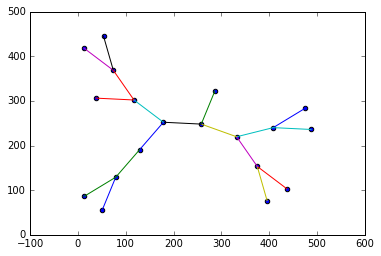

In [11]:
plot(node, edge)

In [12]:



print(t._cache_ntips())
print(t.leafcount)
print(t.children[0].leafcount)
print(t.children[1].leafcount)

print(t.children[0].children[0].leafcount)
print(t.children[0].children[1].leafcount)
print(t.children[1].children[0].leafcount)
print(t.children[1].children[1].leafcount)


#self.assertEquals(t.children[1].leafcount, 2)
#self.assertEquals(t.children[0].children[0].leafcount, 1)
#self.assertEquals(t.children[0].children[1].leafcount, 1)
#self.assertEquals(t.children[1].children[0].leafcount, 1)
#self.assertEquals(t.children[1].children[1].leafcount, 1)


None
5
3
2
2
1
1
1
